## Scientific Computation  2020 Lab 3 Solution

### Task 1: Barabasi-Albert network

The Barabasi-Albert model for complex networks is based on the idea that networks evolve over time and that new nodes are more likely to link to high-degree nodes. It is (probably) the single-most important model in the field of network science as it reproduces several important qualitative features seen in large complex real-world networks.
In this task, you will use NetworkX to generate B-A networks and investigate their properties.

1) The B-A model requires two input parameters: the total number of nodes (*N*), and the number of links, *L*,  added between a new node and the existing network upon its introduction. Use the function *nx.barabasi_albert_graph* to generate a B-A graph with *N=500* and *L=4*. Draw your graph (with node_size=6) and zoom into the figure and look around -- do you see any hubs?

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


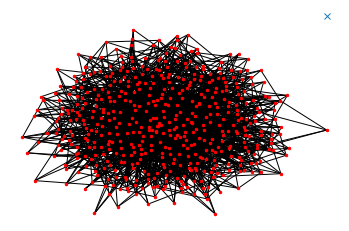

In [2]:
import networkx as nx
%pylab inline
G = nx.barabasi_albert_graph(500,4)
figure()
plot(1,1,'x')
nx.draw(G,node_size=6)

2) Now, generate a B-A graph with *N=5000*, *L=4*, and an Erdos-Renyi (GNP) graph with *N=5000* and *P=0.002*.
Compute the degree distributions for these graphs and plot them on a log-log plot.

<Figure size 432x288 with 0 Axes>

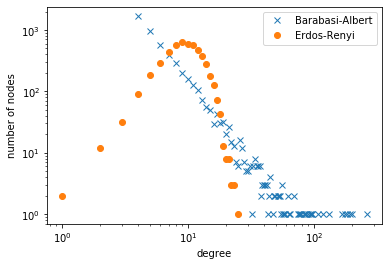

In [3]:
BA = nx.barabasi_albert_graph(5000,4)
ER = nx.gnp_random_graph(5000,0.002)
figure()
D_BA = nx.degree_histogram(BA)
D_ER = nx.degree_histogram(ER)
figure()
loglog(D_BA,'x')
loglog(D_ER,'o')
xlabel('degree')
ylabel('number of nodes')
legend(('Barabasi-Albert','Erdos-Renyi'))


3) The global clustering coefficient, *C*, is the average of the clustering coefficients of each node in a network and can be computed with *nx.cluster.average_clustering*. Compute and compare *C* for the E-R and B-A graphs (see the lecture 6 slides for the definition of *C*).

In [4]:
C_ER = nx.cluster.average_clustering(ER)
C_BA = nx.cluster.average_clustering(BA)
print("E-R graph, C=",C_ER)
print("B-A graph, C=",C_BA)


E-R graph, C= 0.001754410322989406
B-A graph, C= 0.01042363142478481


### Task 2: String matching efficiency

Our simple pattern-search algorithm utilizes a character-by-character comparison of the pattern with sub-strings in the larger genetic sequence:

In [5]:
infile = open('test_sequence.txt','r')
S = infile.read() #(long) gene sequence
infile.close()
P = 'TCGATCGGAAGT' #example pattern

imatch=[] #list of match locations
n,m=len(S),len(P)

#Iterate through data
for ind in range(0,n-m+1):
    if ind%100000==0: print("ind=",ind)
    match=True
    for j in range(m): #character-by-character comparison
        if P[j] != S[ind+j]:
            match=False
            break
    if match:
        print("match found!, ind=",ind)
        imatch.append(ind)
            

ind= 0
ind= 100000
ind= 200000
ind= 300000
ind= 400000
ind= 500000
ind= 600000
ind= 700000
ind= 800000
ind= 900000
ind= 1000000
ind= 1100000
ind= 1200000
ind= 1300000
ind= 1400000
ind= 1500000
ind= 1600000
ind= 1700000
ind= 1800000
ind= 1900000
ind= 2000000
ind= 2100000
ind= 2200000
ind= 2300000
ind= 2400000
ind= 2500000
ind= 2600000
ind= 2700000
ind= 2800000
ind= 2900000
ind= 3000000
ind= 3100000
ind= 3200000
match found!, ind= 3268774
ind= 3300000
ind= 3400000
ind= 3500000
ind= 3600000
ind= 3700000
ind= 3800000
ind= 3900000
ind= 4000000
ind= 4100000
ind= 4200000
ind= 4300000
ind= 4400000
ind= 4500000
ind= 4600000
ind= 4700000
ind= 4800000
ind= 4900000
ind= 5000000
ind= 5100000
ind= 5200000
ind= 5300000
ind= 5400000
ind= 5500000
ind= 5600000
ind= 5700000
ind= 5800000
ind= 5900000
ind= 6000000
ind= 6100000
ind= 6200000
ind= 6300000
ind= 6400000
ind= 6500000
ind= 6600000
ind= 6700000
ind= 6800000
ind= 6900000
ind= 7000000
ind= 7100000
ind= 7200000
ind= 7300000
ind= 7400000
ind= 7500000


In Python, it is possible to directly compare strings. For example, given two strings, S1 and S2, we can simply check if S1==S2. We don't know (without doing a little research) the algorithm Python uses for this comparison or if it will be better than the approach used in our pattern search code.

1) How does the use of direct string comparison affect the speed of the pattern search code?

In [6]:
from time import time
#Add code here

def psearch1(S,P):
    imatch=[] #list of match locations
    n,m=len(S),len(P)

    #Iterate through data
    for ind in range(0,n-m+1):
        match=True
        for j in range(m): #character-by-character comparison
            if P[j] != S[ind+j]:
                match=False
                break
        if match:
            print("match found!, ind=",ind)
            imatch.append(ind)
    return imatch

def psearch2(S,P):
    imatch=[] #list of match locations
    n,m=len(S),len(P)

    #Iterate through data
    for ind in range(0,n-m+1):
        match=True
        if P!=S[ind:ind+m]: match=False
        if match:
            print("match found!, ind=",ind)
            imatch.append(ind)
    return imatch

P=S[242:453] #set pattern

#original algorithm
t1 = time()
psearch1(S,P)
t2 = time()
dt1 = t2-t1

#modified algorithm
t1 = time()
psearch2(S,P)
t2 = time()
dt2 = t2-t1
print("dt1=",dt1)
print("dt2=",dt2)

match found!, ind= 242
match found!, ind= 700
match found!, ind= 1158
match found!, ind= 1616
match found!, ind= 2074
match found!, ind= 2532
match found!, ind= 2990
match found!, ind= 3448
match found!, ind= 3906
match found!, ind= 4364
match found!, ind= 4822
match found!, ind= 242
match found!, ind= 700
match found!, ind= 1158
match found!, ind= 1616
match found!, ind= 2074
match found!, ind= 2532
match found!, ind= 2990
match found!, ind= 3448
match found!, ind= 3906
match found!, ind= 4364
match found!, ind= 4822
dt1= 15.118542194366455
dt2= 6.622809171676636


In the example above, the direct string comparison is roughly twice as fast, though the time difference does depend on the pattern length and decreases for very long patterns.

2) Use numerical tests to construct an estimate of the asymptotic running time of direct string comparison. How does it compare to character-by-character comparison?

In [9]:
#add code here
import timeit
Np1 = 10000 #length of pattern
i1 = 372 #arbitrary indices
i2 = 98241

#Compare S1 and S2
S1 = S[i1:i1+Np1]
S2 = S[i2:i2+Np1]
t1 = time();S1==S2;t2=time()
dt1 = t2-t1

#Repeat with strings twice as long
Np2 = Np1*2
i1 = 372 #arbitrary indices
i2 = 98241

S1 = S[i1:i1+Np2]
S2 = S[i2:i2+Np2]
t1 = time();S1==S2;t2=time()
dt2 = t2-t1

print("N1=%d,dt1=%f"%(Np1,dt1))
print("N2=%d,dt2=%f"%(Np2,dt2))

print("S1[0:5]=",S1[0:5])
print("S2[0:5]=",S2[0:5])


N1=10000,dt1=0.000055
N2=20000,dt2=0.000051
S1[0:5]= CGCGT
S2[0:5]= GGATC


There appears to be no dependence on the pattern length, but what happens if we compare two "nearly-matching" strings?:

In [8]:
Np1 = 10000 #length of pattern
i1 = 372 #arbitrary indices
i2 = 98241

#Compare S1 and S2
S1 = S[i1:i1+Np1]
S2 = S1[:-1]+'T'
t1 = time();
for i in range(1000):
    x= S1==S2
t2=time()
dt1 = t2-t1

#Repeat with strings twice as long
Np2 = Np1*2
i1 = 372 #arbitrary indices
i2 = 98241

S1 = S[i1:i1+Np2]
S2 = S1[:-1]+'T'
t1 = time()
for i in range(1000):
    y=S1==S2
t2=time()
dt2 = t2-t1

print("N1=%d,dt1=%f"%(Np1,dt1))
print("N2=%d,dt2=%f"%(Np2,dt2))

print("S1[0:5]=",S1[0:5])
print("S2[0:5]=",S2[0:5])

N1=10000,dt1=0.001480
N2=20000,dt2=0.002881
S1[0:5]= CGCGT
S2[0:5]= CGCGT


We have looped over many comparisons to get a reliable estimate for the time. In the result above, we see that doubling the string length (roughly) doubles the time indicating an O(M) dependence for matching or nearly-matching strings (of length M). In fact, the Python string matching algorithm is essentially identical to our character-by-character approach. It tends to be faster because it is written in *c*. 